In [39]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [40]:
# read the dataset
df_sales = pd.read_csv('advertising.csv')
df_sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [41]:
# exploratory data analysis
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [42]:
df_sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [43]:
# check for missing values in the dataset 
print(df_sales.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


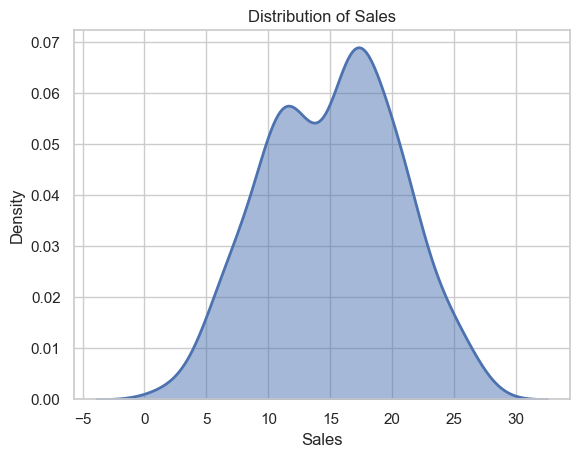

In [44]:
# visualise the distribution of the target variable
sns.kdeplot(df_sales['Sales'], fill=True, label='Sales', alpha=0.5, linewidth=2)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()

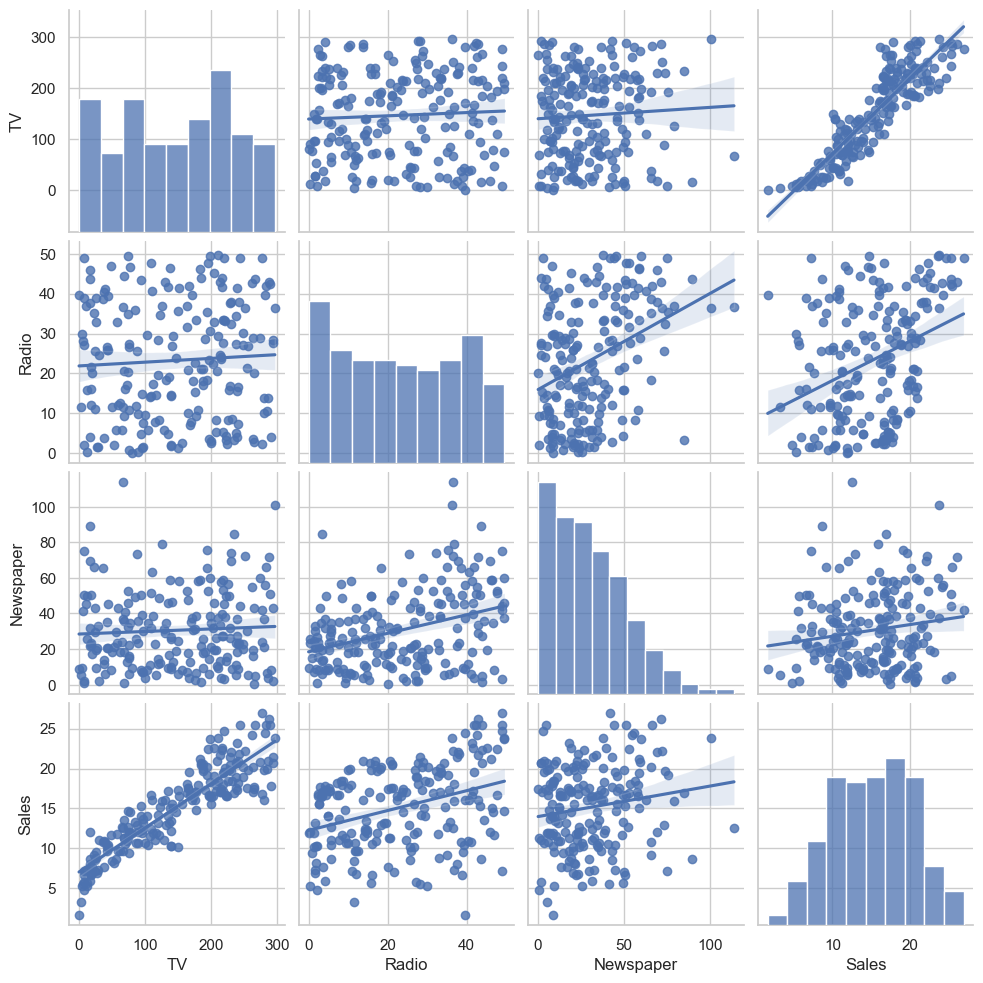

In [45]:
# visualise the distribution of the features
sns.pairplot(df_sales, kind='reg')
plt.show()

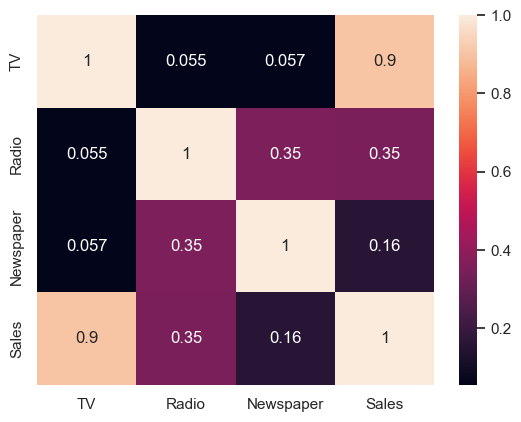

In [46]:
# visualise the correlation matrix
sns.heatmap(df_sales.corr(), annot=True)
plt.show()

        TV  Radio  Newspaper  Sales
0      0.7   39.6        8.7    1.6
1      4.1   11.6        5.7    3.2
2      5.4   29.9        9.4    5.3
3      7.3   28.1       41.4    5.5
4      7.8   38.9       50.6    6.6
..     ...    ...        ...    ...
195  289.7   42.3       51.2   25.4
196  290.7    4.1        8.5   17.8
197  292.9   28.3       43.2   21.4
198  293.6   27.7        1.8   20.7
199  296.4   36.3      100.9   23.8

[200 rows x 4 columns]


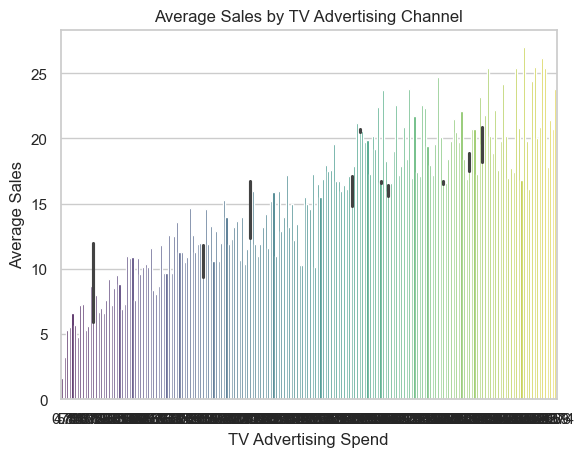

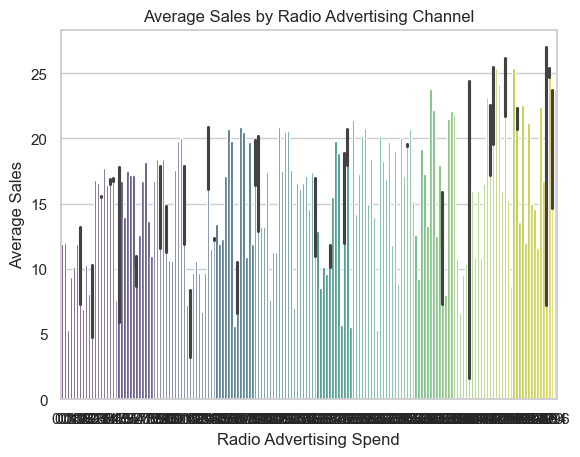

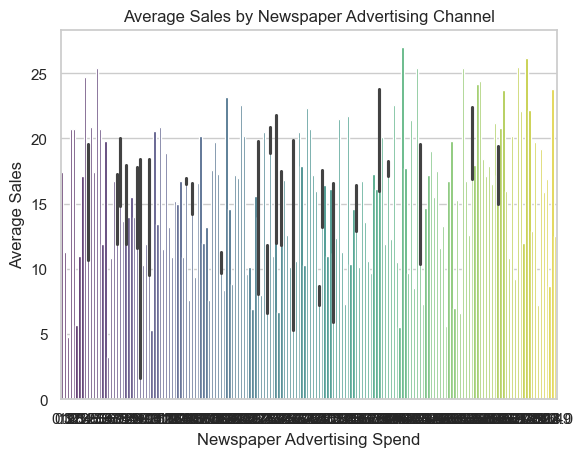

In [47]:
# Create a pivot table for average sales by advertising channel
pivot_sales = pd.pivot_table(df_sales, values='Sales', index=['TV', 'Radio', 'Newspaper'], aggfunc='mean').reset_index()

# Display the pivot table
print(pivot_sales)

# Visualization
# You can visualize the average sales by each advertising channel using a bar plot
sns.barplot(x='TV', y='Sales', data=pivot_sales, palette='viridis')
plt.title('Average Sales by TV Advertising Channel')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Average Sales')
plt.show()

# If you want to visualize for other channels, you can do similarly
sns.barplot(x='Radio', y='Sales', data=pivot_sales, palette='viridis')
plt.title('Average Sales by Radio Advertising Channel')
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Average Sales')
plt.show()

sns.barplot(x='Newspaper', y='Sales', data=pivot_sales, palette='viridis')
plt.title('Average Sales by Newspaper Advertising Channel')
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Average Sales')
plt.show()


In [48]:
# assign the features and target variable
X = df_sales.drop('Sales', axis=1)
y = df_sales['Sales']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shapes of the training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_log_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
# define the model
rfr = RandomForestRegressor()

# fit the model
rfr.fit(X_train, y_train)

# make predictions
y_pred = rfr.predict(X_test)

# evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(rfr, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = abs(scores)

# report performance
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

# RandomizedSearchCV
params = {
    'n_estimators': range(10, 50, 10),
    'max_depth': [3, 5, 10, None], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# define the model
rfr = RandomForestRegressor()

# define the random search
random_search = RandomizedSearchCV(rfr, param_distributions=params, n_iter=5, cv=cv, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1)

# fit the random search
random_search.fit(X, y)

# print the best parameters
print(random_search.best_params_)

# print the best score
print(random_search.best_score_)

# print the best estimator
print(random_search.best_estimator_)

# predict on the test set
y_pred_random = random_search.predict(X_test)

# evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_random))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_random))
print('R-squared:', r2_score(y_test, y_pred_random))

Mean Absolute Error: 0.9023249999999999
Mean Squared Error: 1.4604364750000047
R-squared: 0.9527383661099441
Mean MAE: 0.875 (0.207)
{'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
-0.9814266897202744
RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=20)
Mean Absolute Error: 0.6117498449467192
Mean Squared Error: 0.7152870214663061
R-squared: 0.9768523767287797


In [58]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
import numpy as np

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr.params)

# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred_linear = lr.predict(X_test_sm)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r_squared = r2_score(y_test, y_pred_linear)

# Print metrics
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")


const        4.714126
TV           0.054509
Radio        0.100945
Newspaper    0.004337
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     468.7
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           8.51e-78
Time:                        15:43:16   Log-Likelihood:                -305.78
No. Observations:                 160   AIC:                             619.6
Df Residuals:                     156   BIC:                             631.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------